In [3]:
import os
os.chdir("..")

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from importlib import reload
import Saxs2dProfile as s2p
import Saxs1dProfile as s1p
import XafsData as xd
import util

print("python", sys.version_info)
print("numpy", np.__version__)
print("cv2", cv2.__version__) # type: ignore
print("matplotlib", matplotlib.__version__) # type: ignore
print("cwd", os.getcwd())

python sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)
numpy 1.25.1
cv2 4.8.0
matplotlib 3.7.2
cwd /home/oishi/SpectraSpark


In [ ]:
reload(s2p)
reload(s1p)
reload(xd)
reload(util)
print(s2p.__version__)
print(s1p.__version__)
print(xd.__version__)
print(util.__version__)

0 <class 'numpy.ndarray'> (232, 1, 2)
[[[119  29]]

 [[118  30]]

 [[114  30]]

 [[113  31]]

 [[111  31]]

 [[110  32]]

 [[109  32]]

 [[108  33]]

 [[106  33]]

 [[105  34]]]
((128.0, 128.0), (140.5087127685547, 199.2136993408203), 0.0)


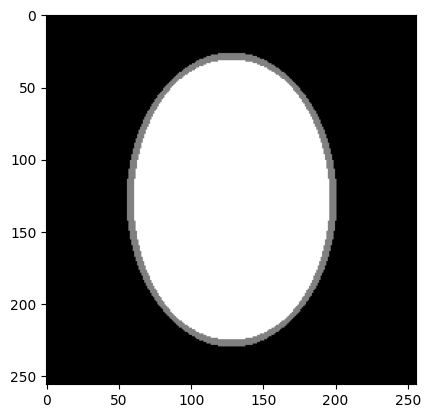

In [19]:
height, width = 256, 256
center_x, center_y = height // 2, width // 2
img = np.zeros((height, width), dtype=np.uint8)
x = np.arange(width).repeat(height).reshape(width, -1) - center_x
y = np.tile(np.arange(height), (width, 1)) - center_y
img[x**2 + 2*y**2 < 100**2] = 255

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i, cnt in enumerate(contours):
    print(i, type(cnt), cnt.shape)
    print(cnt[:10])
    img = cv2.drawContours(img, [cnt], 0, 128, 3)
    ellipse = cv2.fitEllipse(cnt)
    print(ellipse)

plt.imshow(img, cmap='gray')

In [31]:
rotate = lambda pt, theta: np.array([np.cos(theta)*pt[0]-np.sin(theta)*pt[1], np.sin(theta)*pt[0]+np.cos(theta)*pt[1]])
pts = np.array([[rotate([np.cos(t)-1, 2*np.sin(t)], np.pi/4)] for t in np.linspace(0, 2*np.pi, 5)])
print(pts.shape)
ellipse = cv2.fitEllipse(pts.astype(np.float32))
print(ellipse)

(5, 1, 2)
((-0.7071068286895752, -0.7071067690849304), (1.951175570487976, 4.479670524597168), 59.1208381652832)


(195, 487) int32
460 27
453 55
449 83
448 110
449 138
454 166
((15816476065792.0, 27.666833877563477), (0.0, 26277756928.0), 0.0)


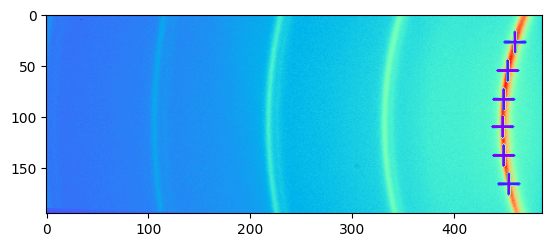

In [28]:
profile = s2p.Saxs2dProfile.load_tiff('testdata/s202/Static/AgBeh002.tif')
img = profile.values(log=False)
print(img.shape, img.dtype)

n_points = 6
pts = np.empty((n_points,1,2),dtype=int)
for _i, _y in enumerate(np.linspace(0, img.shape[0]-1, n_points+2, dtype=int)[1:-1]):
    _x = img[_y,:].argmax()
    pts[i,0,:] = [_x, _y]
    print(_x,_y)
    cv2.drawMarker(img, (_x,_y), 0, cv2.MARKER_CROSS, 20, 2)
plt.imshow(img, cmap='rainbow')
ellipse = cv2.fitEllipse(pts.astype(np.float32))
print(ellipse)